In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [2]:
from aux_func_States import *
from functions_for_plotting import *

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

## AMPK -> u200 and u34 -> mtROS

In [15]:
dirn='../coupledWReg_Ccode/crosstalk_Au_u3m/'
xlabel='$\lambda_{Au}$'
ylabel='$\lambda_{u3m}$'
title='AMPK  $-> \mu_{200}$   and   $ \mu_{34}->$ mtROS'
fsave='figures/crosstalk_Au_u3m'


In [104]:
label_dir={}
count=0
all_data =[]
first=True
dirn = "../coupledWReg_Ccode/crosstalk_u3n_u3m_HS_input/"
for filen in os.listdir(dirn):
    print filen
    
    if "EMT_" in filen and "res.txt" in filen:
        start = 6
        tmp = float(filen.split("_")[start])*1.+float(filen.split("_")[start+1])/10.**(len(filen.split("_")[start+1]))
        print tmp,filen
        if tmp not in label_dir:
            label_dir[tmp]=count
            count+=1
        if first:
            dFinal = pd.read_csv(dirn+filen).dropna()
            dFinal['label']=label_dir[tmp]
            first=False
        else:
            df = pd.read_csv(dirn+filen).dropna()
            df['label']=label_dir[tmp]
            dFinal = dFinal.append(df, ignore_index=True)  

EMT_MR_comp_Input_0_u3m_0_100_u3n_0_760_HS_6_0_1000_res.txt
0.1 EMT_MR_comp_Input_0_u3m_0_100_u3n_0_760_HS_6_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_100_u3n_0_300_HS_3_0_1000_.png
EMT_MR_comp_Input_0_u3m_0_400_u3n_0_760_HS_9_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_760_HS_9_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_244_u3n_0_505_HS_6_0_1000_ics.txt
EMT_MR_comp_Input_100000_u3m_0_400_u3n_0_760_HS_3_0_1000_res.txt
0.4 EMT_MR_comp_Input_100000_u3m_0_400_u3n_0_760_HS_3_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_100_u3n_0_760_HS_3_0_1000_res.txt
0.1 EMT_MR_comp_Input_0_u3m_0_100_u3n_0_760_HS_3_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_400_u3n_0_505_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_100000_u3m_0_400_u3n_0_300_HS_9_0_1000_.png
EMT_MR_comp_Input_0_u3m_0_397_u3n_0_760_HS_3_0_1000_.png
EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_300_HS_3_0_1000_res.txt
0.1 EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_300_HS_3_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_244_u3n_0_760_HS_6_0_1000_ics.txt
EMT_MR_c

EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_505_HS_6_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_000_HS_3_0_1000_res.txt
0.4 EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_000_HS_3_0_1000_res.txt
EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_000_HS_9_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_300_u3n_0_760_HS_6_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_397_u3n_0_760_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_100_u3n_0_760_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_000_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_760_HS_3_0_1000_.png
EMT_MR_comp_Input_0_u3m_0_397_u3n_0_300_HS_3_0_1000_res.txt
0.397 EMT_MR_comp_Input_0_u3m_0_397_u3n_0_300_HS_3_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_505_HS_6_0_1000_res.txt
0.1 EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_505_HS_6_0_1000_res.txt
EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_760_HS_3_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_100_u3n_0_505_HS_3_0_1000_res.txt
0.1 EMT_MR_comp_Input_50000_u3m_0_100_u3

EMT_MR_comp_Input_50000_u3m_0_244_u3n_0_300_HS_6_0_1000_.png
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_300_HS_3_0_1000_.png
EMT_MR_comp_Input_100000_u3m_0_397_u3n_0_300_HS_9_0_1000_res.txt
0.397 EMT_MR_comp_Input_100000_u3m_0_397_u3n_0_300_HS_9_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_000_HS_6_0_1000_res.txt
0.3 EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_000_HS_6_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_397_u3n_0_300_HS_3_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_244_u3n_0_760_HS_9_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_100_u3n_0_000_HS_6_0_1000_.png
EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_760_HS_9_0_1000_res.txt
0.244 EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_760_HS_9_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_000_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_505_HS_3_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_760_HS_3_0_1000_res.txt
0.4 EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_760_HS_3_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_300

EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_000_HS_3_0_1000_res.txt
0.1 EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_000_HS_3_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_760_HS_3_0_1000_res.txt
0.3 EMT_MR_comp_Input_100000_u3m_0_300_u3n_0_760_HS_3_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_760_HS_6_0_1000_.png
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_505_HS_9_0_1000_res.txt
0.3 EMT_MR_comp_Input_0_u3m_0_300_u3n_0_505_HS_9_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_300_u3n_0_000_HS_9_0_1000_res.txt
0.3 EMT_MR_comp_Input_0_u3m_0_300_u3n_0_000_HS_9_0_1000_res.txt
EMT_MR_comp_Input_50000_u3m_0_244_u3n_0_760_HS_6_0_1000_res.txt
0.244 EMT_MR_comp_Input_50000_u3m_0_244_u3n_0_760_HS_6_0_1000_res.txt
EMT_MR_comp_Input_0_u3m_0_400_u3n_0_000_HS_6_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_397_u3n_0_000_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_100_u3n_0_760_HS_3_0_1000_.png
res_emt_mrH.cpp
EMT_MR_comp_Input_50000_u3m_0_300_u3n_0_300_HS_6_0_1000_res.txt
0.3 EMT_MR_comp_Input_5000

EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_000_HS_9_0_1000_res.txt
0.1 EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_000_HS_9_0_1000_res.txt
EMT_MR_comp_Input_50000_u3m_0_300_u3n_0_000_HS_6_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_300_u3n_0_505_HS_3_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_397_u3n_0_760_HS_6_0_1000_res.txt
0.397 EMT_MR_comp_Input_50000_u3m_0_397_u3n_0_760_HS_6_0_1000_res.txt
EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_000_HS_9_0_1000_res.txt
0.244 EMT_MR_comp_Input_100000_u3m_0_244_u3n_0_000_HS_9_0_1000_res.txt
EMT_MR_comp_Input_50000_u3m_0_400_u3n_0_760_HS_6_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_100_u3n_0_760_HS_6_0_1000_.png
EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_760_HS_6_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_100_u3n_0_505_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_100000_u3m_0_100_u3n_0_000_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_50000_u3m_0_244_u3n_0_505_HS_6_0_1000_.png
EMT_MR_comp_Input_50000_u3m_0_300_u3n_0_300_HS_3_0_1000_ics.txt
EMT_MR_comp_Input_0_u3m_0_397_u3n_

In [105]:
data =dFinal.values[:,:-2]
print data,data.shape
x = (data -np.mean(data,axis=0))/np.std(data,axis=0)
print x.shape

pca = PCA(n_components=2)
pc_res = pca.fit_transform(x)
print pca.explained_variance_ratio_


[[1.17085411e+04 3.25466258e+02 5.22211693e+04 ... 3.29196397e+02
  3.10735050e+01 6.82538549e+02]
 [1.17085411e+04 3.25466258e+02 5.22211693e+04 ... 3.29196397e+02
  3.10735050e+01 6.82538549e+02]
 [1.87135103e+04 6.54154420e+01 6.40029686e+03 ... 3.30044524e+02
  3.12327010e+01 6.85953243e+02]
 ...
 [1.14089354e+03 1.05490691e+03 8.12305391e+05 ... 1.50145253e+02
  2.54015700e+00 2.64773640e+01]
 [1.14089354e+03 1.05490691e+03 8.12305391e+05 ... 1.50145253e+02
  2.54015700e+00 2.64773640e+01]
 [4.58256168e+02 1.52901314e+03 1.37262599e+06 ... 1.40232281e+02
  9.66370700e+00 2.92319063e+02]] (180000, 10)
(180000, 10)
[0.64286916 0.23110422]


In [106]:
print pc_res,pc_res.shape

[[ 3.82418777  0.68069508]
 [ 3.82418777  0.68069508]
 [ 4.28412844  0.78774655]
 ...
 [ 0.25304275 -2.84214002]
 [ 0.25304275 -2.84214002]
 [-1.35856398 -0.57635731]] (180000, 2)


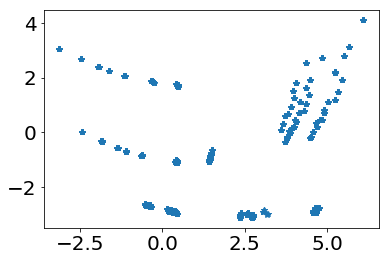

In [107]:
plt.plot(pc_res[:,0],pc_res[:,1],'*')

In [108]:
# Separating out the features
x = dFinal.values[:,:-2]
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pc_res = pca.fit_transform(x)
print pca.explained_variance_ratio_


[0.64286916 0.23110422]


In [ ]:
colors = ['r','b','m','k','g','orange','y']
for i in range(len(pc_res)):
    plt.plot(pc_res[i,0],pc_res[i,1],'*',color=colors[dFinal['label'][i]])